**Using SQL with Python: SQLAlchemy and Pandas**

As a data scientist, you rely on Python for in-depth data analysis, visualization, and modeling. However, when dealing with data stored in a relational database, SQL is essential for extracting and manipulating that data. So, how do you integrate SQL with Python to fully leverage your data's potential?

In this tutorial, we'll explore how to combine the strengths of SQL with the versatility of Python using SQLAlchemy and Pandas. We'll cover how to connect to databases, run SQL queries using SQLAlchemy, and then analyze and visualize the data with Pandas. Let's dive in and maximize your data capabilities with Python and SQL!



In [4]:
#installing sqlalchemy library
!pip install SQLAlchemy
!pip install psycopg2

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 495.5 kB/s eta 0:00:03
   ---- ----------------------------------- 0.1/1.2 MB 1.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.2 MB 1.8 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.2 MB 1.9 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.2 MB 2.2 MB/s eta 0:00:01
   ------------------------ --------------- 0.7/1.2 MB 2.4 MB/s eta 0:00:01
   ----------------------------- ---------- 0.8/1.2 MB 2.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.0/1.2 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 2.5 MB/s eta 0:00:00


**1. Saving the Pandas DataFrame as an SQL Table**

To create the SQL table using the CSV dataset, we will do the following steps:

1. Create a SQLite database using the SQLAlchemy.
2. Load the CSV dataset "countries_poluation" using the Pandas. This dataset consists of the Air Quality Index for all countries in the world from 2017 to 2023.
3. Convert all the AQI columns from object to numerical and drop row with missing values.

We will use the following libraries for our task:

1. SQLAlchemy is the Python SQL toolkit and Object Relational Mapper that gives application developers the full power and flexibility of SQL.
2. Psycopg is the most popular PostgreSQL database adapter for the Python programming language

In [5]:
# Import necessary packages
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

In [6]:
# creating the new database
engine = create_engine(
    "sqlite:///pollution.db")

In [7]:
# read the CSV dataset
path = r"C:\Users\Lekhansh\Downloads\pollution.csv"
data = pd.read_csv(path)

col = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

for s in col:
    data[s] = pd.to_numeric(data[s], errors='coerce')

    data = data.dropna(subset=[s])

In [8]:
data.head()

,city,country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,0.0,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,0.0,0.0,0.0,16.0,12.5,14.5,14.4
2,Algiers,Algeria,0.0,0.0,21.2,20.2,20.0,17.8,17.4
3,Ordino,Andorra,0.0,0.0,0.0,7.4,7.3,5.4,5.3
4,Luanda,Angola,0.0,0.0,15.9,13.0,11.0,8.8,8.7


Save the Pandas dataframe as a SQL table. The `to_sql` function requires a table name and the engine object.  


In [9]:
# save the dataframe as a SQLite table
data.to_sql('countries_poluation', engine, if_exists='replace')

6855

As a result, your SQLite database is saved in your file directory. 

**2. Loading the SQL Table using Pandas**


To load the entire table from the SQL database as a Pandas d ftaframwe will do the below steps:
:

Establish the connection with our database by providing the database

Use the `pd.read_sql_table` function to load the entire table and convert it into a Pandas data frame. The function requires table anime, engine objects, and column names.

Display the top 10 rows.rows. 


In [10]:
# establish a connection with the database
engine = create_engine("sqlite:///kdnuggets.db")

# read the sqlite table
table_df = pd.read_sql_table(
    "countries_poluation",
    con=engine,
    columns=['city', 'country', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023']
)
 
table_df.head()

,city,country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,0.0,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,0.0,0.0,0.0,16.0,12.5,14.5,14.4
2,Algiers,Algeria,0.0,0.0,21.2,20.2,20.0,17.8,17.4
3,Ordino,Andorra,0.0,0.0,0.0,7.4,7.3,5.4,5.3
4,Luanda,Angola,0.0,0.0,15.9,13.0,11.0,8.8,8.7


**3. Running the SQL Query using Pandas**


Instead of restricting ourselves to one table, we can access the entire database by using the `pd.read_sql` function. Just write a simple SQL query and provide it with the engine object.

The SQL query will display two columns from the "countries_population" table, sort it by the "2023" column, and display the top 5 rests.




In [11]:
# selecting top 10 most polluted countries from 2023

sql_df = pd.read_sql(
    "SELECT city,[2023] FROM countries_poluation ORDER BY [2023] DESC LIMIT 10",
    con=engine
)
 
print(sql_df)

          city  2023
0       Lahore  97.4
1        Hotan  95.0
2      Bhiwadi  93.3
3  Delhi (NCT)  92.7
4     Peshawar  91.9
5   Faisalabad  91.5
6    N'Djamena  91.1
7       Asopur  90.4
8    New Delhi  89.2
9        Patna  89.2


**4. Using the SQL Query Result for Analysis and Visualization**


We can also use the results from SQL query and perform further analysis. For example, calculate the average of the top five cities using Panda 



In [12]:
average_air = sql_df['2023'].mean() #mean function is used with sql_df
print(f"The average of top 5 cities: {average_air:.2f}") #.2f is used for 2 decimal places

The average of top 5 cities: 92.17


We can also create a bar plot by specifying the x and y arguments and the type of plot. 

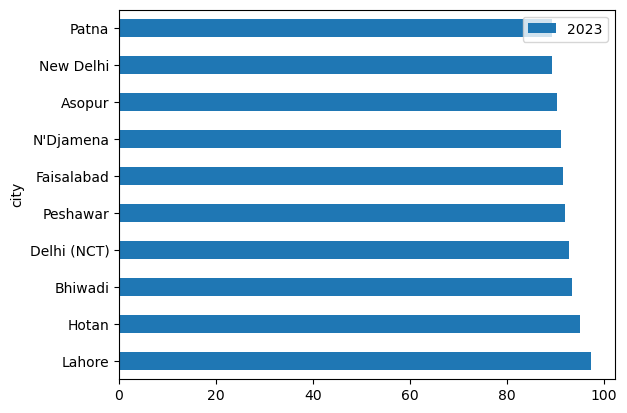

In [13]:
sql_df.plot(x="city",y="2023",kind = "barh");

In this short tutorial, we learned how to load a SQL database into Python, perform data analysis, and create visualizations. If you enjoyed this guide, you will also appreciate 'A Guide to Working with SQLite Databases in Python', which provides an in-depth exploration of using Python's built-in sqlite3 module.
